In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from keras import optimizers
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import EfficientNetB0, ResNet50, VGG16
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix

2024-12-17 14:46:24.670472: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
### paths
train_aug_path = "../Organized_Data/augmented_train/"
#orig_train_path = "../Organized_Data/train/" # no data augmentation 
test_path = "../Organized_Data/test/"

In [3]:
## reading in data
train_set = ImageDataGenerator(rescale = 1./255)

train_set = train_set.flow_from_directory(
    directory = train_aug_path,
    target_size = (150,150),
    batch_size = 128, # changed to 128 from 64 because pretty husky data
    class_mode = 'categorical'
)

test_set = ImageDataGenerator(rescale = 1./255)

test_set = test_set.flow_from_directory(
    directory=test_path,
    target_size = (150,150),
    batch_size = 128,
    class_mode = 'categorical',
    shuffle=False
)

Found 46481 images belonging to 4 classes.
Found 9272 images belonging to 4 classes.


In [4]:
model_save_paths = {
    "simple_cnn": "../Models/model_1_baseline_2_layer_cnn.keras",
    "deeper_cnn": "../Models/model_2_basic_3_layer_cnn.keras"#,
    #"efficientnet": "../Models/model_3_transfer_EfficientNET.keras",
    #"resnet50": "../Models/model_4_transfer_ResNet50.keras",
    #"vgg16": "../Models/model_5_transfer_VGG16.keras"
}

In [5]:
# Callbacks
early_stopping = EarlyStopping(monitor='loss', 
                                patience=2, 
                                restore_best_weights=True, 
                                verbose=1)

def create_callbacks(path):
    return ModelCheckpoint(filepath=path, 
                            monitor='loss', 
                            save_best_only=True, 
                            verbose=1)

In [6]:
# Model Eval
def evaluate_model(model, model_name):
    test_loss, test_acc, test_precision, test_recall = model.evaluate(test_set, verbose=1)
    print(f"\n{model_name} - Test Accuracy: {test_acc * 100:.2f}%")
    print(f"{model_name} - Test Precision: {test_precision * 100:.2f}%")
    print(f"{model_name} - Test Recall: {test_recall * 100:.2f}%")
    
    y_pred = model.predict(test_set)
    pred_classes = np.argmax(y_pred, axis=1)
    true_classes = test_set.classes

    class_labels = list(test_set.class_indices.keys())
    
    # classification report
    print(f"\n{model_name} - Classification Report:")
    print(classification_report(true_classes, pred_classes, target_names=class_labels))

    # confusion matrix
    print(f"\n{model_name} - Confusion Matrix:")
    conf_matrix = confusion_matrix(true_classes, pred_classes)
    print(conf_matrix)
    
    ### Add Seaborn Heatmap for Confusion Matrix? ###
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.xticks(rotation=0)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

#### Basic CNN

In [7]:
model_simple = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPool2D(2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')
])

model_simple.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy', 'precision', 'recall']
)

history_simple = model_simple.fit(
    train_set,
    epochs=10,
    callbacks=[early_stopping, create_callbacks(model_save_paths['simple_cnn'])],
    verbose=1
)

/Users/rosemarymejia/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10


/Users/rosemarymejia/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


364/364 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7142 - loss: 0.7809 - precision: 0.8027 - recall: 0.5970
Epoch 1: loss improved from inf to 0.34361, saving model to ../Models/model_1_baseline_2_layer_cnn.keras
364/364 ━━━━━━━━━━━━━━━━━━━━ 524s 1s/step - accuracy: 0.7146 - loss: 0.7797 - precision: 0.8031 - recall: 0.5976
Epoch 2/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9949 - loss: 0.0219 - precision: 0.9956 - recall: 0.9946
Epoch 2: loss improved from 0.34361 to 0.01784, saving model to ../Models/model_1_baseline_2_layer_cnn.keras
364/364 ━━━━━━━━━━━━━━━━━━━━ 518s 1s/step - accuracy: 0.9949 - loss: 0.0219 - precision: 0.9956 - recall: 0.9946
Epoch 3/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9992 - loss: 0.0045 - precision: 0.9992 - recall: 0.9992
Epoch 3: loss improved from 0.01784 to 0.00331, saving model to ../Models/model_1_baseline_2_layer_cnn.keras
364/364 ━━━━━━━━━━━━━━━━━━━━ 472s 1s/step - accuracy: 0.9992 - loss: 0.0045 - precision: 0.9992 

73/73 ━━━━━━━━━━━━━━━━━━━━ 34s 451ms/step - accuracy: 0.7374 - loss: 1.5567 - precision: 0.7433 - recall: 0.7313

Simple CNN - Test Accuracy: 61.78%
Simple CNN - Test Precision: 62.26%
Simple CNN - Test Recall: 61.26%
73/73 ━━━━━━━━━━━━━━━━━━━━ 31s 421ms/step

Simple CNN - Classification Report:
                    precision    recall  f1-score   support

           Control       0.82      0.81      0.81      5063
     Mild Dementia       0.20      0.26      0.22      1220
 Moderate Dementia       0.00      0.00      0.00       244
Very Mild Dementia       0.50      0.47      0.49      2745

          accuracy                           0.62      9272
         macro avg       0.38      0.39      0.38      9272
      weighted avg       0.62      0.62      0.62      9272


Simple CNN - Confusion Matrix:
[[4113  468    1  481]
 [ 229  312   25  654]
 [  39   31    0  174]
 [ 650  788    4 1303]]


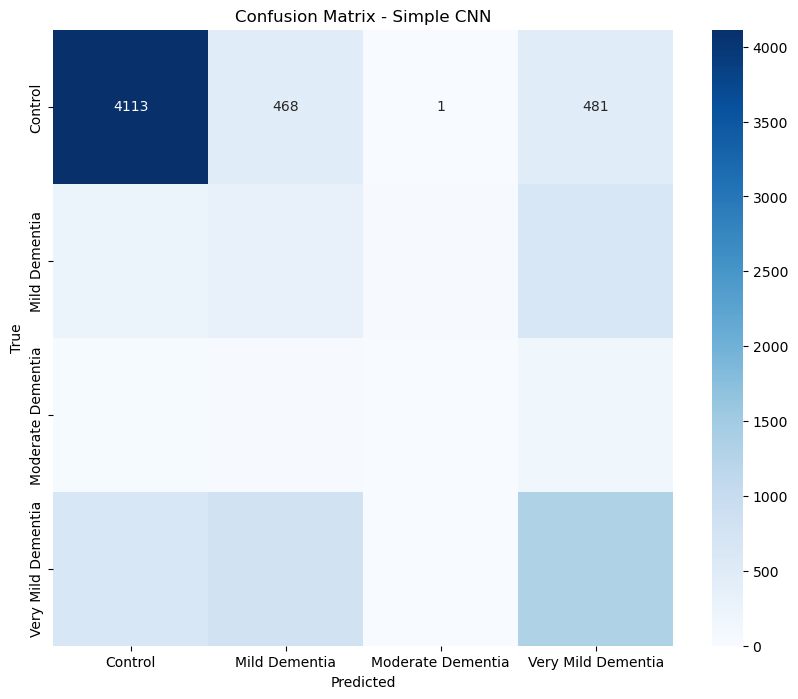

In [8]:
evaluate_model(model_simple, "Simple CNN")

### Deeper CNN 

In [9]:
model_deeper = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPool2D(2),
    BatchNormalization(),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D(2),
    BatchNormalization(),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPool2D(2),
    BatchNormalization(),

    Dropout(0.5),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

model_deeper.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy', 'precision', 'recall']
)

history_deeper = model_deeper.fit(
    train_set,
    epochs=10,
    callbacks=[early_stopping, create_callbacks(model_save_paths['deeper_cnn'])],
    verbose=1
)

/Users/rosemarymejia/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6295 - loss: 1.5476 - precision: 0.7505 - recall: 0.4945
Epoch 1: loss improved from inf to 0.75366, saving model to ../Models/model_2_basic_3_layer_cnn.keras
364/364 ━━━━━━━━━━━━━━━━━━━━ 749s 2s/step - accuracy: 0.6298 - loss: 1.5454 - precision: 0.7507 - recall: 0.4949
Epoch 2/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8604 - loss: 0.3158 - precision: 0.9050 - recall: 0.8228
Epoch 2: loss improved from 0.75366 to 0.28570, saving model to ../Models/model_2_basic_3_layer_cnn.keras
364/364 ━━━━━━━━━━━━━━━━━━━━ 746s 2s/step - accuracy: 0.8604 - loss: 0.3157 - precision: 0.9050 - recall: 0.8229
Epoch 2: early stopping
Restoring model weights from the end of the best epoch: 1.


73/73 ━━━━━━━━━━━━━━━━━━━━ 36s 483ms/step - accuracy: 0.8664 - loss: 1.8750 - precision: 0.8664 - recall: 0.8664

Deeper CNN - Test Accuracy: 54.61%
Deeper CNN - Test Precision: 54.61%
Deeper CNN - Test Recall: 54.61%
73/73 ━━━━━━━━━━━━━━━━━━━━ 36s 491ms/step

Deeper CNN - Classification Report:
                    precision    recall  f1-score   support

           Control       0.55      1.00      0.71      5063
     Mild Dementia       0.00      0.00      0.00      1220
 Moderate Dementia       0.00      0.00      0.00       244
Very Mild Dementia       0.00      0.00      0.00      2745

          accuracy                           0.55      9272
         macro avg       0.14      0.25      0.18      9272
      weighted avg       0.30      0.55      0.39      9272


Deeper CNN - Confusion Matrix:
[[5063    0    0    0]
 [1220    0    0    0]
 [ 244    0    0    0]
 [2745    0    0    0]]


/Users/rosemarymejia/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rosemarymejia/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rosemarymejia/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

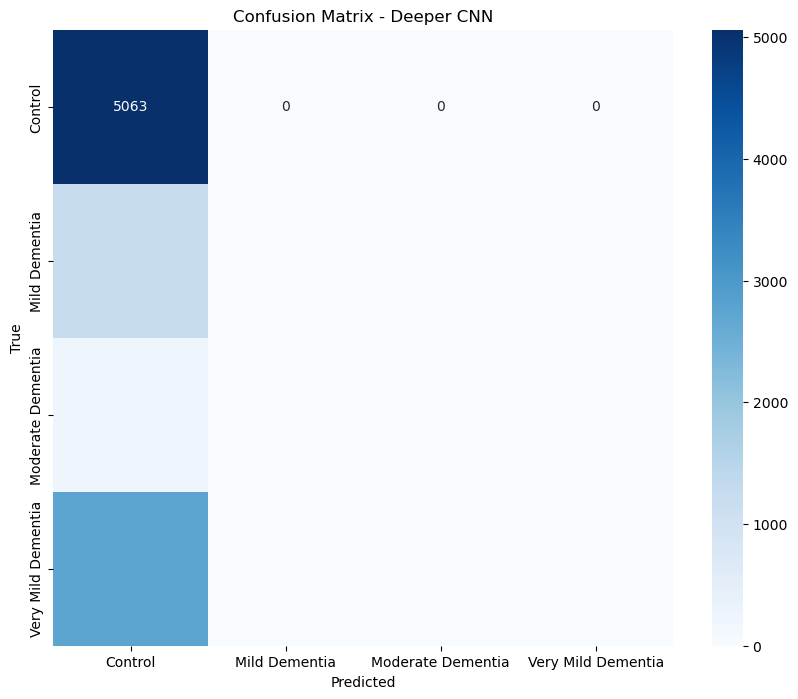

In [10]:
evaluate_model(model_deeper, "Deeper CNN")

### Customized Deeper CNN 

In [11]:
model_customized = load_model('../Models/model_2a_customized_3_layer_cnn.keras')

/Users/rosemarymejia/anaconda3/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 18 variables whereas the saved optimizer has 34 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


73/73 ━━━━━━━━━━━━━━━━━━━━ 30s 395ms/step - accuracy: 0.8288 - loss: 1.2243 - precision: 0.8300 - recall: 0.8286

Customized Deep CNN - Test Accuracy: 62.49%
Customized Deep CNN - Test Precision: 62.69%
Customized Deep CNN - Test Recall: 62.44%
73/73 ━━━━━━━━━━━━━━━━━━━━ 30s 411ms/step

Customized Deep CNN - Classification Report:
                    precision    recall  f1-score   support

           Control       0.70      0.94      0.80      5063
     Mild Dementia       0.31      0.30      0.30      1220
 Moderate Dementia       0.00      0.00      0.00       244
Very Mild Dementia       0.53      0.25      0.34      2745

          accuracy                           0.62      9272
         macro avg       0.38      0.37      0.36      9272
      weighted avg       0.58      0.62      0.58      9272


Customized Deep CNN - Confusion Matrix:
[[4756  260   13   34]
 [ 377  363    6  474]
 [ 151    9    0   84]
 [1515  555    0  675]]


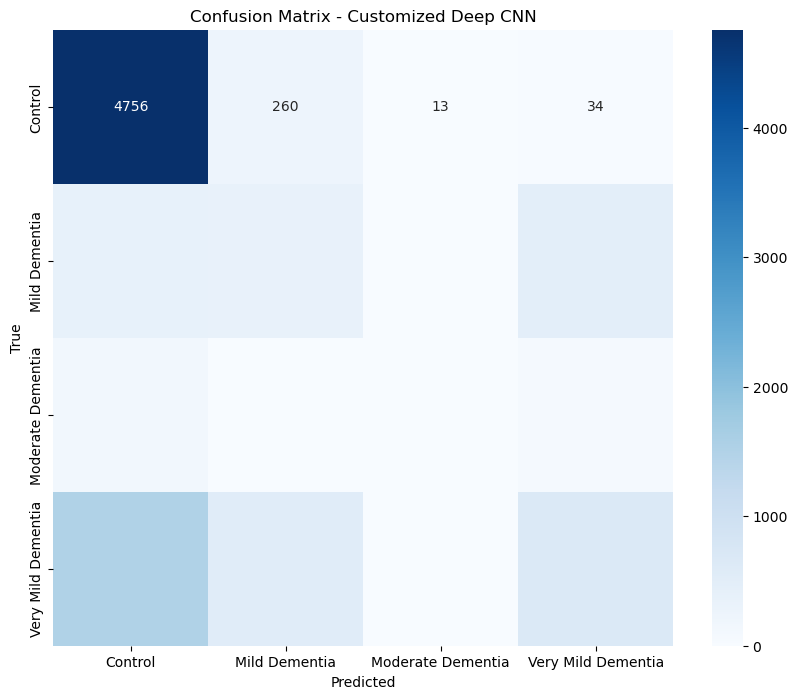

In [12]:
evaluate_model(model_customized, "Customized Deep CNN")

### Transfer Learning Section -- Didn't really work out as planned (ended up dropping section)

#### EfficientNet Model

In [13]:
# EfficientNet Model
base_model_eff = EfficientNetB0(include_top=False, input_shape=(150, 150, 3), weights='imagenet')
base_model_eff.trainable = True

# freeze first layers, fine-tune the last few layers
for layer in base_model_eff.layers[:-3]:
    layer.trainable = False

model_eff = Sequential([
    base_model_eff,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

model_eff.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy', 'precision', 'recall']
)

history_eff = model_eff.fit(
    train_set,
    epochs=10,
    callbacks=[early_stopping, create_callbacks(model_save_paths['efficientnet'])],
    verbose=1
)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3673 - loss: 1.3648 - precision: 0.3804 - recall: 0.0132
Epoch 1: loss improved from inf to 1.35191, saving model to ../Models/model_3_transfer_EfficientNET.keras
364/364 ━━━━━━━━━━━━━━━━━━━━ 998s 3s/step - accuracy: 0.3673 - loss: 1.3648 - precision: 0.3804 - recall: 0.0132
Epoch 2/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3836 - loss: 1.3446 - precision: 0.4217 - recall: 0.0027
Epoch 2: loss improved from 1.35191 to 1.34474, saving model to ../Models/model_3_transfer_EfficientNET.keras
364/364 ━━━━━━━━━━━━━━━━━━━━ 985s 3s/step - accuracy: 0.3836 - loss: 1.3446 - precision: 0.4216 - recall: 0.0027
Epoch 2: early stopping
Restoring model weights from the end of the best epoch: 1.


73/73 ━━━━━━━━━━━━━━━━━━━━ 186s 2s/step - accuracy: 0.8664 - loss: 1.0929 - precision: 0.0000e+00 - recall: 0.0000e+00

EfficientNetB0 - Test Accuracy: 54.61%
EfficientNetB0 - Test Precision: 0.00%
EfficientNetB0 - Test Recall: 0.00%
73/73 ━━━━━━━━━━━━━━━━━━━━ 187s 3s/step

EfficientNetB0 - Classification Report:
                    precision    recall  f1-score   support

           Control       0.55      1.00      0.71      5063
     Mild Dementia       0.00      0.00      0.00      1220
 Moderate Dementia       0.00      0.00      0.00       244
Very Mild Dementia       0.00      0.00      0.00      2745

          accuracy                           0.55      9272
         macro avg       0.14      0.25      0.18      9272
      weighted avg       0.30      0.55      0.39      9272


EfficientNetB0 - Confusion Matrix:
[[5063    0    0    0]
 [1220    0    0    0]
 [ 244    0    0    0]
 [2745    0    0    0]]


/Users/rosemarymejia/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rosemarymejia/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rosemarymejia/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

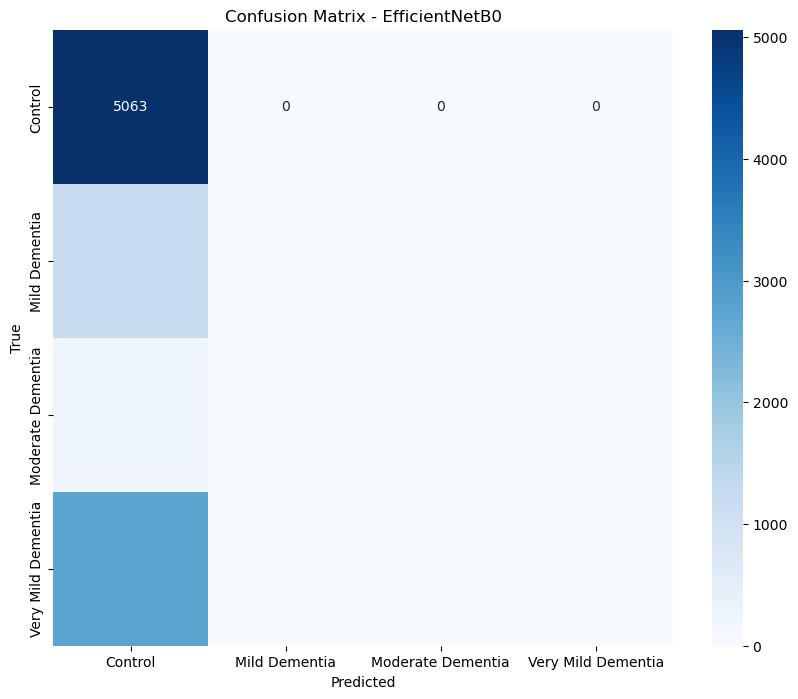

In [14]:
evaluate_model(model_eff, "EfficientNetB0")

#### ResNet50 Model

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7034 - loss: 0.6823 - precision: 0.7749 - recall: 0.6227
Epoch 1: loss improved from inf to 0.51188, saving model to ../Models/model_4_transfer_ResNet50.keras
364/364 ━━━━━━━━━━━━━━━━━━━━ 1328s 4s/step - accuracy: 0.7036 - loss: 0.6818 - precision: 0.7751 - recall: 0.6230
Epoch 2/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8768 - loss: 0.3133 - precision: 0.8934 - recall: 0.8583
Epoch 2: loss improved from 0.51188 to 0.28524, saving model to ../Models/model_4_transfer_ResNet50.keras
364/364 ━━━━━━━━━━━━━━━━━━━━ 1318s 4s/step - accuracy: 0.8768 - loss: 0.3132 - precision: 0.8934 - recall: 0.8583
Epoch 2: early stopping
Restoring model weights from the end of the best epoch: 1.
73/73 ━━━━━━━━━━━━━━━━━━━━ 226s 3s/step - accuracy: 0.0787 - loss: 7.9554 - precision: 0.0782 - recall: 0.0781

ResNet50 - Test Accuracy: 14.21%
ResNet50 - Test Precision: 14.17%
ResNet5

/Users/rosemarymejia/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rosemarymejia/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rosemarymejia/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

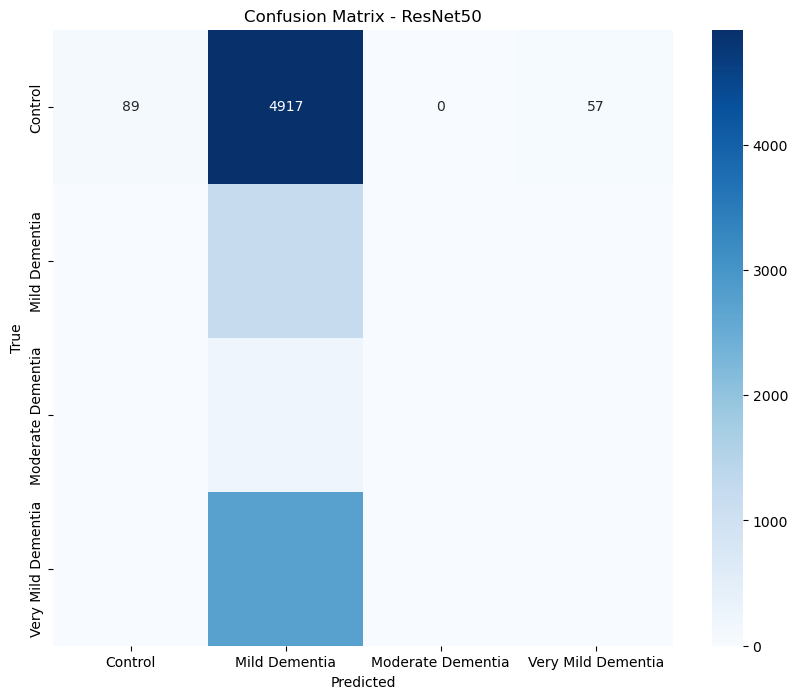

In [15]:
base_model_resnet = ResNet50(include_top=False, input_shape=(150, 150, 3), weights='imagenet')
base_model_resnet.trainable = True

# Freeze first layers, fine-tune the last few layers
for layer in base_model_resnet.layers[:-3]:
    layer.trainable = False

model_resnet = Sequential([
    base_model_resnet,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

model_resnet.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy', 'precision', 'recall']
)

history_resnet = model_resnet.fit(
    train_set,
    epochs=10,
    callbacks=[early_stopping, create_callbacks(model_save_paths['resnet50'])],
    verbose=1
)
evaluate_model(model_resnet, "ResNet50")

#### VGG16 Model

In [16]:
base_model_vgg = VGG16(include_top=False, input_shape=(150, 150, 3), weights='imagenet')
base_model_vgg.trainable = True

# Freeze first layers, fine-tune the last few layers
for layer in base_model_vgg.layers[:-3]:
    layer.trainable = False

model_vgg = Sequential([
    base_model_vgg,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

model_vgg.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy', 'precision', 'recall']
)

history_vgg = model_vgg.fit(
    train_set,
    epochs=10,
    callbacks=[early_stopping, create_callbacks(model_save_paths['vgg16'])],
    verbose=1
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
 27/364 ━━━━━━━━━━━━━━━━━━━━ 57:02 10s/step - accuracy: 0.2670 - loss: 2.2807 - precision: 0.2953 - recall: 0.1110

KeyboardInterrupt: 

In [ ]:
evaluate_model(model_vgg, "VGG16")